In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Helper function to calculate percentages
def calculate_percentage(count, total):
    return (count / total) * 100 if total > 0 else 0

**Graphs of union output from all 3 models (roberta hate, roberta toxic and toxicbert)**

In [ ]:
combined_2021 = pd.read_csv('/content/drive/My Drive/Data Sample/combined_2021.csv')
combined_2223 = pd.read_csv('/content/drive/My Drive/Data Sample/combined_2223.csv')

In [ ]:
# comments classified as toxic
toxic_2021 = combined_2021[(combined_2021['toxic_label'] == 'toxic') | (combined_2021['toxic_label2'] == 1.)]
toxic_2223 = combined_2223[(combined_2223['toxic_label'] == 'toxic') | (combined_2223['toxic_label2'] == 1.)]

# comments classified as hate
hate_2021 = combined_2021[(combined_2021['hate_label'] == 'HATE') | (combined_2021['hate_label2'] == '1.')]
hate_2223 = combined_2223[(combined_2223['hate_label'] == 'HATE') | (combined_2223['hate_label2'] == 1.)]

# all comments classified as hate/toxic
hatetoxic_2021 = combined_2021[
    (combined_2021['hate_label'] == 'HATE') |
    (combined_2021['toxic_label'] == 'toxic') |
    (combined_2021['toxic_label2'] == 1.) |
    (combined_2021['hate_label2'] == 1.)
]

hatetoxic_2223 = combined_2223[
    (combined_2223['hate_label'] == 'HATE') |
    (combined_2223['toxic_label'] == 'toxic') |
    (combined_2223['toxic_label2'] == 1.)|
    (combined_2223['hate_label2'] == 1.)
]

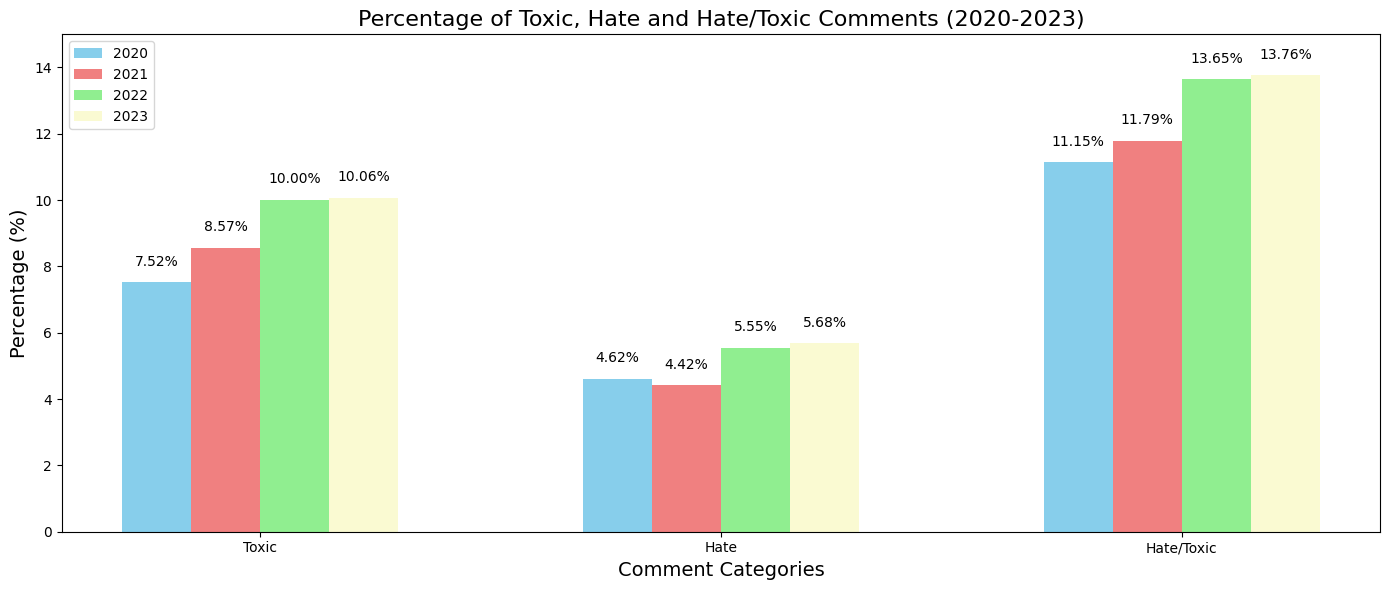

In [ ]:
# For each year, calculate total comments and toxic/hate counts
years = [2020, 2021, 2022, 2023]
data_dict = {
    'total_comments': [len(combined_2021[combined_2021['year'] == year]) if year < 2022
                       else len(combined_2223[combined_2223['year'] == year])
                       for year in years],
    'toxic_counts': [len(toxic_2021[toxic_2021['year'] == year]) if year < 2022
                     else len(toxic_2223[toxic_2223['year'] == year])
                     for year in years],
    'hate_counts': [len(hate_2021[hate_2021['year'] == year]) if year < 2022
                    else len(hate_2223[hate_2223['year'] == year])
                    for year in years],
    'toxic_and_hate_counts': [len(hatetoxic_2021[hatetoxic_2021['year'] == year]) if year < 2022
                              else len(hatetoxic_2223[hatetoxic_2223['year'] == year])
                              for year in years]
}

# Calculate percentages
percentages = {
    'Toxic': [calculate_percentage(data_dict['toxic_counts'][i], data_dict['total_comments'][i]) for i in range(4)],
    'Hate': [calculate_percentage(data_dict['hate_counts'][i], data_dict['total_comments'][i]) for i in range(4)],
    'Hate/Toxic': [calculate_percentage(data_dict['toxic_and_hate_counts'][i], data_dict['total_comments'][i]) for i in range(4)]
}

# Create DataFrame for plotting
df = pd.DataFrame(percentages, index=years)

# Set up the plot
bar_width = 0.15
x = range(len(df.columns))
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightgoldenrodyellow']

plt.figure(figsize=(14, 6))

# Plot each year's data
for i, year in enumerate(years):
    plt.bar([p + i * bar_width for p in x], df.loc[year], width=bar_width, label=str(year), color=colors[i])

# Add labels and title
plt.title('Percentage of Toxic, Hate and Hate/Toxic Comments (2020-2023)', fontsize=16)
plt.xlabel('Comment Categories', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 15)
plt.xticks([p + 1.5 * bar_width for p in x], df.columns)

# Adding percentage values on top of the bars
for i in range(len(df.columns)):
    for j, year in enumerate(years):
        plt.text(i + j * bar_width, df.loc[year, df.columns[i]] + 0.5, f'{df.loc[year, df.columns[i]]:.2f}%', ha='center', fontsize=10)

# Show legend
plt.legend()
plt.tight_layout()
plt.show()

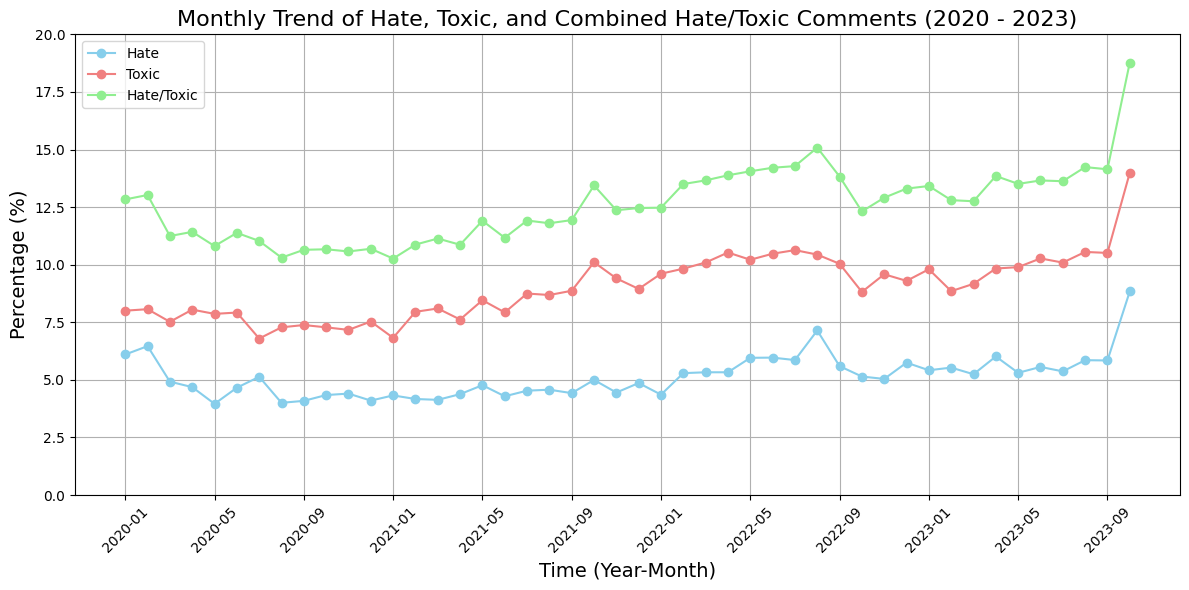

In [ ]:
# Assuming 'samplehatetoxic_2021' and 'samplehatetoxic_2223' each have 'month', 'year', 'hate_label', and 'toxic_label' columns
dataframes = {
    2020: combined_2021[combined_2021['year'] == 2020],
    2021: combined_2021[combined_2021['year'] == 2021],
    2022: combined_2223[combined_2223['year'] == 2022],
    2023: combined_2223[combined_2223['year'] == 2023]
}

# Initialize lists to store data for plotting
dates = []
hate_percentages = []
toxic_percentages = []
hatetoxic_percentages = []

# Calculate monthly sentiment percentages
for year, df in dataframes.items():
    for month in range(1, 13):
        if year == 2023 and month > 10:  # Stop at October 2023
            break

        # Filter data for the specific month
        month_data = df[df['month'] == month]

        # Count occurrences for each category
        total_comments = len(month_data)
        hate_count = len(month_data[(month_data['hate_label'] == 'HATE') | (month_data['hate_label2'] == 1.)])
        toxic_count = len(month_data[(month_data['toxic_label'] == 'toxic') | (month_data['toxic_label2'] == 1.)])
        hatetoxic_count = len(month_data[(month_data['toxic_label'] == 'toxic') | (month_data['toxic_label2'] == 1.) | (month_data['hate_label'] == 'HATE') | (month_data['hate_label2'] == 1.)])


        # Calculate percentages
        hate_percentage = (hate_count / total_comments * 100) if total_comments > 0 else 0
        toxic_percentage = (toxic_count / total_comments * 100) if total_comments > 0 else 0
        hatetoxic_percentage = (hatetoxic_count / total_comments * 100) if total_comments > 0 else 0

        # Append date and percentages to lists
        dates.append(f'{year}-{month:02}')  # Format as YYYY-MM for x-axis
        hate_percentages.append(hate_percentage)
        toxic_percentages.append(toxic_percentage)
        hatetoxic_percentages.append(hatetoxic_percentage)

# Plotting the trend from 2020 to October 2023
plt.figure(figsize=(12, 6))

# Plot each category
plt.plot(dates, hate_percentages, marker='o', color='skyblue', linestyle='-', label='Hate')
plt.plot(dates, toxic_percentages, marker='o', color='lightcoral', linestyle='-', label='Toxic')
plt.plot(dates, hatetoxic_percentages, marker='o', color='lightgreen', linestyle='-', label='Hate/Toxic')

# Customize plot
plt.title('Monthly Trend of Hate, Toxic, and Combined Hate/Toxic Comments (2020 - 2023)', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 20)

# Set x-axis labels at intervals to reduce clutter
plt.xticks(range(0, len(dates), 4), dates[::4], rotation=45)  # Show every third label

plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()
